In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import ast 
import seaborn as sb
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import matplotlib.cm as cm

# RFAM 

In [4]:
rfam_data = pd.read_csv('../../../data/rfam/all_data_toPlot.csv')

In [5]:
rfam_data


,Unnamed: 0,Hamming Distance,Tool,ed,id,mfe,sequences
0,0,0.0,rnaevol,0.000895,0,-28.300000,CGCCGGCAGCGGCACGGCCGCAAAGAAAGCCCAAAAACAAGGGCAA...
1,1,0.0,rnaevol,0.000896,0,-28.300000,AGCGCCCAGCGGCAAAGCCGCAAAAAAAGGCCAAAAAAAAGGCCAA...
2,2,0.0,rnaevol,0.000894,0,-29.100000,AGGGCCCAGCGGCACAGCCGCAAAACAAGGCCAGAAAAAAGGCCAA...
3,3,0.0,rnaevol,0.000935,0,-28.300000,AGCCCCCAGCCGCAAAGCGGCAAAAAAAGCGCAAAUUAAAGCGCAA...
4,4,0.0,rnaevol,0.000901,0,-28.300000,AGCGCCCAGCGCCAAAGGCGCAAAAAAAGCCCAAAAACAAGGGCAA...
...,...,...,...,...,...,...,...
595,295,0.0,nupack,0.041217,29,-132.100006,GCUGUUGUCGGUCCAGCGCAAAAGGCCUAGAAUACAGCCCUAGAUC...
596,296,0.0,nupack,0.055370,29,-123.699997,CGAAUAUUACCGCUUCCCGAAUCCGAACGCACAAAAUGUCACCCUU...
597,297,19.0,nupack,0.122345,29,-127.400002,CUCUCCGUCGCAGUACCUCCCCCAACGCAACAUUUAUGGGCGCCCA...
598,298,6.0,nupack,0.046020,29,-123.800003,GAGUUUUCGAUCCAUGGGCUUUUAGGUCUCUCCACUUCUGUCUCGU...


In [6]:
rnaevol_rfam = rfam_data[rfam_data['Tool']=='rnaevol']
nupack_rfam = rfam_data[rfam_data['Tool']=='nupack']
#rnainverse_rfam = rfam_data[rfam_data['Tool']=='rnainverse']

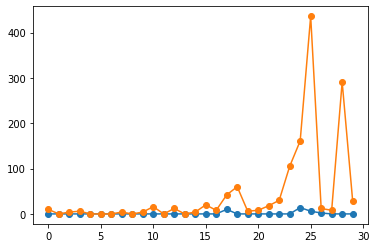

In [7]:
plt.plot([sum(rnaevol_rfam[rnaevol_rfam['id']==i]['Hamming Distance'].values) for i in range(30)], 'o-')
plt.plot([sum(nupack_rfam[nupack_rfam['id']==i]['Hamming Distance'].values) for i in range(30)], 'o-')
#plt.plot([sum(rnainverse_rfam[rnainverse_rfam['id']==i]['Hamming Distance'].values) for i in range(30)], 'o-')

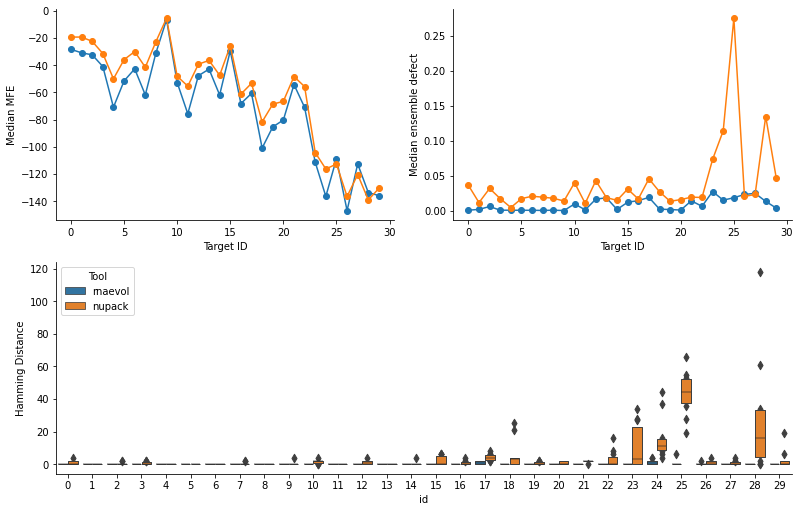

In [9]:
figure = plt.figure(constrained_layout=True, figsize=(11,7))
gs = figure.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Target ID')
plt.ylabel('Median MFE')
plt.plot([np.median(rnaevol_rfam[rnaevol_rfam['id']==i]['mfe'].values) for i in range(30)], 'o-')
plt.plot([np.median(nupack_rfam[nupack_rfam['id']==i]['mfe'].values) for i in range(30)], 'o-')
#plt.plot([np.median(rnainverse_rfam[rnainverse_rfam['id']==i]['mfe'].values) for i in range(30)], 'o-')


ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Target ID')
plt.ylabel('Median ensemble defect')
#plt.yscale('log')
plt.plot([np.median(rnaevol_rfam[rnaevol_rfam['id']==i]['ed'].values) for i in range(30)], 'o-')
plt.plot([np.median(nupack_rfam[nupack_rfam['id']==i]['ed'].values) for i in range(30)], 'o-')
#plt.plot([np.median(rnainverse_rfam[rnainverse_rfam['id']==i]['ed'].values) for i in range(30)], 'o-')

ax = figure.add_subplot(gs[1,0:])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#sb.set(rc={'figure.figsize': (20., 8.27)})
#plt.ylabel('Hamming Distance')
ax.set_ylabel('Hamming Distance')
sb.boxenplot(ax=ax, y='Hamming Distance', x='id', hue='Tool', data=rfam_data)
plt.savefig('../../../images/rfam_NPvsRevol.pdf')

In [28]:
sb.boxenplot?

# ETERNA100

In [10]:
eterna_bensh = pd.read_csv('../../../data/eterna/all_eterna.csv')

In [11]:
eterna_bensh

,Unnamed: 0,Hamming Distance,Tool,ed,id,mfe,sequences,structure
0,4,0.0,rnaevol,0.001571,1,-10.2,GGGCCGAAAAAGGCCC,(((((......)))))
1,5,0.0,rnaevol,0.001559,1,-10.2,GGCCCGGGAAAGGGCC,(((((......)))))
2,6,0.0,rnaevol,0.001559,1,-10.2,GGCCCGAAAAAGGGCC,(((((......)))))
3,7,0.0,rnaevol,0.001559,1,-10.2,GGCCCGAAAAAGGGCC,(((((......)))))
4,5,0.0,sentrna,0.002101,1,-5.1,GCAUCAAAAAAGAUGC,(((((......)))))
...,...,...,...,...,...,...,...,...
535,155,8.0,rnainverse,0.403364,95,-20.0,UAUGUUUGCCAUGGUUUGUACCGUGACUUCGGGGAGUCGGCGUAGG...,.((((((((((((((....)))))(((((....))))))))...((...
536,156,0.0,rnainverse,0.019753,95,-55.5,CAGGGACCCCGCCGCUAAUGCGGCGCGCCGAAAGGCGCGGGGGCGG...,..(((((((((((((....)))))(((((....))))))))(((((...
537,157,6.0,rnainverse,0.525306,95,-26.4,CGGCUUCGGUCUAUGCUAUUAUGGGCCUUCGGCGAGGCAUCGGUAA...,..(((((((((((((....)))))(((((....)))))......((...
538,158,2.0,rnainverse,0.473660,95,-23.8,UGUUUCUCCGGUGUGUGUAUAUACGACAAGAUAUUGUCCGGGGCCU...,.((((((((((((((....)))))(((((....))))))))(((((...


In [63]:
rnaevol_eterna = eterna_bensh[eterna_bensh['Tool']=='rnaevol']
sentrna_eterna = eterna_bensh[eterna_bensh['Tool']=='sentrna']
erd_eterna = eterna_bensh[eterna_bensh['Tool']=='erd']
rnainverse_eterna = eterna_bensh[eterna_bensh['Tool']=='rnainverse']

In [64]:
dt = [np.median(rnaevol_eterna[rnaevol_eterna['id']==i]['mfe'].values) for i in rnaevol_eterna['id'].values]

In [65]:
target_ids = list(set(rnaevol_eterna['id'].values))

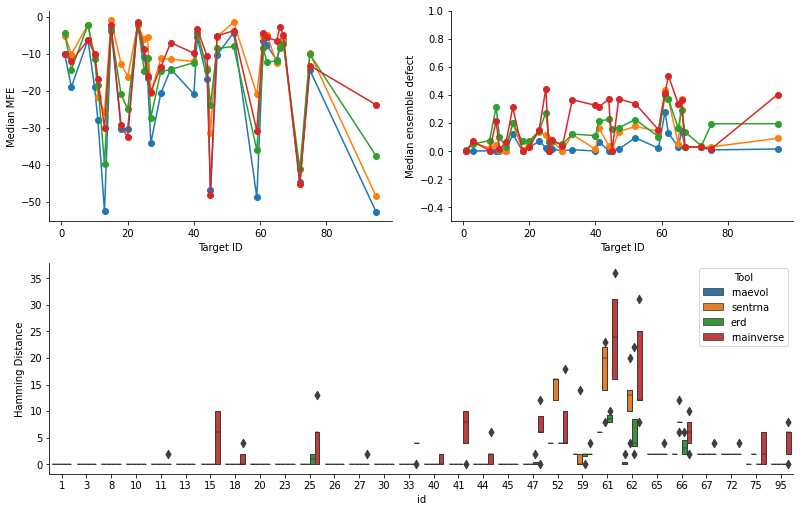

In [69]:
figure = plt.figure(constrained_layout=True, figsize=(11,7))
gs = figure.add_gridspec(nrows=2, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Target ID')
plt.ylabel('Median MFE')
plt.plot(target_ids,[np.median(rnaevol_eterna[rnaevol_eterna['id']==i]['mfe'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')
plt.plot(target_ids,[np.median(sentrna_eterna[sentrna_eterna['id']==i]['mfe'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')
plt.plot(target_ids,[np.median(erd_eterna[erd_eterna['id']==i]['mfe'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')
plt.plot(target_ids,[np.median(rnainverse_eterna[rnainverse_eterna['id']==i]['mfe'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')



ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel('Target ID')
plt.ylabel('Median ensemble defect')
#plt.yscale('log')
plt.ylim((-0.5,1))
plt.plot(target_ids,[np.median(rnaevol_eterna[rnaevol_eterna['id']==i]['ed'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')
plt.plot(target_ids,[np.median(sentrna_eterna[sentrna_eterna['id']==i]['ed'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')
plt.plot(target_ids,[np.median(erd_eterna[erd_eterna['id']==i]['ed'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')
plt.plot(target_ids,[np.median(rnainverse_eterna[rnainverse_eterna['id']==i]['ed'].values) for i in set(rnaevol_eterna['id'].values)], 'o-')


ax = figure.add_subplot(gs[1,0:])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#sb.set(rc={'figure.figsize': (20., 8.27)})
#plt.ylabel('Hamming Distance')
ax.set_ylabel('Hamming Distance')
sb.boxenplot(ax=ax, y='Hamming Distance', x='id', hue='Tool', data=eterna_bensh)
plt.savefig('../../images/eterna_bensh.pdf')

In [16]:
np.median(rnaevol_eterna[rnaevol_eterna['id']==1]['mfe'].values)

-10.2

# CPU Time vs. Quality

In [12]:
rnainverse_data = pd.read_csv('../../../data/eterna/rnainvers_success_rates2.csv')

rnainverse_data

,Unnamed: 0,Sequence,Structure,mfe,hamming,ed,success,time
0,0,"['GCUCAUCGAGCA', 'GCUCCCCGAGCA', 'GCUCCCCGAGCA...","['((((...)))).', '((((...)))).', '((((...))))....","[-3.9, -3.9, -3.9, -3.9, -3.9]","[0, 0, 0, 0, 0]","[0.004303335134679281, 0.004306527858256005, 0...",1.0,0.994
1,1,"['GCCUCAAAAACGAGGC', 'GCCUCGAAAAAGAGGC', 'GCCU...","['(((((......)))))', '(((((......)))))', '((((...","[-7.3, -8.0, -8.0, -7.8, -8.0]","[0, 0, 0, 0, 0]","[0.001822455327712829, 0.001619943540125794, 0...",1.0,1.089
2,2,"['GCUUCGGCAGCUUCGGC', 'GGAAAUCCAGCCUAGGC', 'GC...","['((....)).((....))', '((....)).((....))', '((...","[-7.1, -2.4, -6.1, -4.3, -3.7]","[0, 0, 0, 0, 0]","[0.2842246795256511, 0.20763454549605076, 0.37...",1.0,1.515
3,3,"['CCGCCCCGGCAAAAAGCGCGGGGCAA', 'UCGCCCGCCGGAAA...","['..((((((((.....)).))))))..', '..((((((((.......","[-16.5, -16.0, -17.0, -16.5, -16.5]","[0, 0, 0, 0, 0]","[0.0034534679449221093, 0.0021449802881347508,...",1.0,2.608
4,4,"['GGCGCUACAUGCACGAUCCUAAACUUCGCC', 'GGCGCUUUCU...","['(((((.....))..((.........)))))', '(((((........","[-5.0, -6.3, -6.2, -1.5, -6.7]","[0, 0, 0, 0, 0]","[0.2716240975915723, 0.234609895115272, 0.2787...",1.0,3.274
...,...,...,...,...,...,...,...,...
95,95,['AAAACGCCGGGGCAAGCCGGAGACGGCAAGCUCUAUUGAGCAAG...,['.....((((((((..((((....))))..((((....))))..(...,"[-290.1, -295.2, -305.7, -296.2, -290.0]","[0, 0, 0, 0, 0]","[0.04019660087953669, 0.003974992204192319, 0....",1.0,7939.666
96,96,['UCCCCUCGCUCCCCCCCUGCUCUAAUCCUGCUAAAUCCCUCGUC...,['.......((.........((.........((.........((.....,"[-14.89, -16.69, -33.09, -33.19, -24.69]","[0, 0, 0, 0, 0]","[0.09261917724463281, 0.1309663681328266, 0.00...",1.0,16214.316
97,97,['CACCCCCCCACCCCCCCACCCCCACCCCCCCACCACCCCCCCCC...,['...............................................,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]",1.0,8693.673
98,98,['AAGUCGUAGCUGGAAAUGCCUCGAAAAAGAGGCCCAGCGCAGAA...,['........(((((....(((((......))))))))))((((.....,"[-172.8, -174.1, -171.8, -166.7, -176.3]","[6, 8, 4, 4, 2]","[0.08902200226805398, 0.13889079691298745, 0.0...",0.0,17870.206


In [13]:
with open('../../../data/eterna/rnaevol.time', 'r') as fp : 
    rnaevol_times = fp.read().split('\n')
rnaevol_times.remove('')

In [14]:
rnaevol_times = np.array(rnaevol_times, dtype=float).reshape((99,5))

In [17]:
eterna_data = pd.read_csv('../../../data/eterna/eterna.csv')

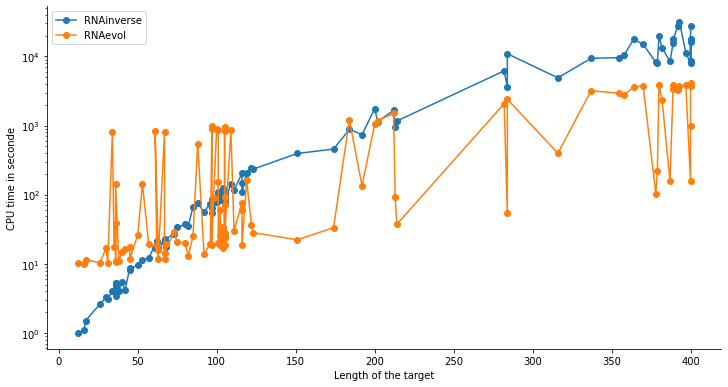

In [59]:
#sb.set(rc={'figure.figsize': (10., 5.27)})
figure = plt.figure(constrained_layout=True, figsize=(10,5.27))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
plt.yscale('log')
x = list(eterna_data['length'].values)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(eterna_data['length'].values,rnainverse_data['time'], 'o-', label='RNAinverse')
plt.plot(x[:99],np.median(rnaevol_times,axis=1), 'o-', label='RNAevol')
plt.ylabel('CPU time in seconde')
plt.xlabel('Length of the target')
plt.legend()
plt.savefig('../../../images/Time.pdf')

In [132]:
rnainverse_medham = []
rnainverse_success = []
for str_ in rnainverse_data['hamming'].values : 
    rnainverse_medham.append(np.median(ast.literal_eval(str_)))
    rnainverse_success.append(list(ast.literal_eval(str_)).count(0)/len(ast.literal_eval(str_)))

In [52]:
colors = cm.rainbow(np.linspace(0, 1, 100))

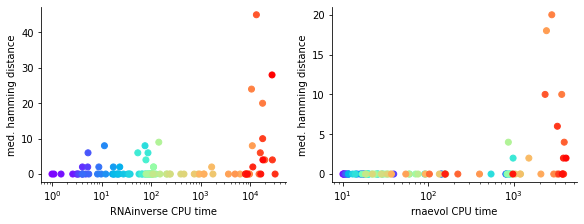

In [69]:
figure = plt.figure(constrained_layout=True, figsize=(8,3))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)

ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xscale('log')
plt.scatter(rnainverse_data['time'],rnainverse_medham,c=colors)
plt.xlabel("RNAinverse CPU time")
plt.ylabel('med. hamming distance')

ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xscale('log')
plt.ylabel('med. hamming distance')
plt.xlabel("rnaevol CPU time")

plt.scatter(np.median(rnaevol_times,axis=1),np.median(rnaevol_ham[:99], axis=1),c=colors[:99])
plt.savefig("../../../images/cpuvssuccess.pdf")

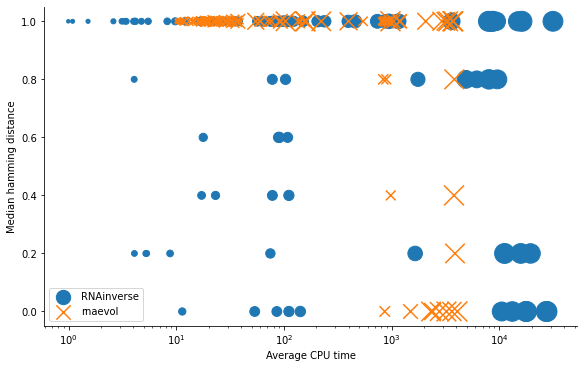

In [137]:
figure = plt.figure(constrained_layout=True, figsize=(8,5))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)

ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel("Average CPU time")
plt.ylabel('Median hamming distance')
plt.xscale('log')
plt.scatter(rnainverse_data['time'],rnainverse_success,label="RNAinverse",s=eterna_data['length'].values)
#plt.plot(rnainverse_data['time'], 'o-', label='RNAinverse')
#ax2=ax.twinx()
#plt.ylabel("rnaevol CPU time")

plt.scatter(np.median(rnaevol_times,axis=1),rnaevol_success[:99],s=eterna_data['length'].values[:99],marker='x',label='rnaevol')
#plt.colorbar()
plt.legend()
plt.savefig("../../../images/cpuvssuccess2.pdf")
plt.show()

In [82]:
plt.colorbar?

In [31]:
df_opGC2 = pd.read_csv('../../../data/eterna/eterna1999op_GC2.csv')

In [32]:
df_opGC2

,Unnamed: 0,sequence,structure,mfe,hamming,ed,gen
0,0,GGCCAAUGGCCA,((((...)))).,-6.0,1.000000,0.002750,0
1,1,GGCCAAUGGCCA,((((...)))).,-6.0,1.000000,0.002750,0
2,2,GGCCAAUGGCCA,((((...)))).,-6.0,1.000000,0.002750,0
3,3,GGCCUGAGGCCA,((((...)))).,-6.0,1.000000,0.002744,0
4,4,GGCCAUUGGCCA,((((...)))).,-6.0,1.000000,0.002750,0
...,...,...,...,...,...,...,...
495,495,CGCAAGAAGGGAGCAAGGGACACAACACAACGAGCCACACACCACA...,(....)..(....(...(..(.(..(...(((.(((...((((......,-185.1,0.111111,0.157570,5000
496,496,GGAAACAAGGAAGGGAAGGGCACAACACACCCACGGAGAGCGAUUA...,(....)..(....(...(..(.(..(...(((.(((...((((......,-188.7,0.090909,0.170158,5000
497,497,CGAAAGAACGAAACGAACGACACGACAGAGCCAGGCAAAGGCGAAA...,(....).......(...(..(.(..(...(((.(((...((((......,-195.5,0.076923,0.163178,5000
498,498,GGAAACAAGAAAACGAGGGACACAACAAAGGCAGCCAAAACCGACA...,(....).......(...(..(.(..(...(((.(((...((((......,-191.7,0.111111,0.141453,5000


In [37]:
rnaevol_ham = df_opGC2['hamming'].values.reshape(100,5)

In [38]:
rnaevol_ham = (1-rnaevol_ham)/rnaevol_ham

In [135]:
rnaevol_success = []
for lis in rnaevol_ham : 
    rnaevol_success.append(list(lis).count(0)/len(lis))

In [136]:
len(rnaevol_success)

100

In [70]:
plt.scatter?